In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle
import json

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#### 1.Problem Statement

In [ ]:
To predict bank customer churn rate using following parameters
1.customer_id
2.credit_score
3.country
4.gender
5.age
6.tenure
7.balance
8.products_number
9.credit_card
10.active_member
11.estimated_salary

#### 2.Data Gathering

In [86]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [87]:
df.columns.tolist()

['customer_id',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

#### 3.Exploratory Data Analysis

##### 1.Missing values

In [88]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
Dataset doesnot have any null value

##### 2.Categorical data(Object Data type)

In [89]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
"gender" and "country" columns have object data type while rest have int and float data type

##### 3.Target Column

In [90]:
df.churn

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [91]:
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

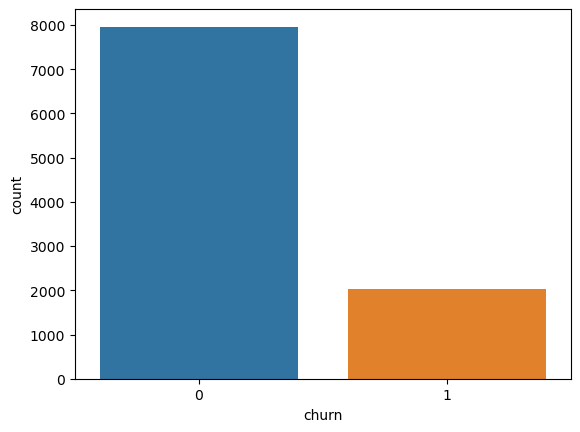

In [92]:
sns.countplot(x = df.churn)

In [93]:
# class 0
7963/10000*100

79.63

In [94]:
# class 0
2037/10000*100

20.369999999999997

#### 4.Feature Engineering

##### 1.Encoding

In [95]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [96]:
df.country

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: country, Length: 10000, dtype: object

In [97]:
df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [98]:
df = pd.get_dummies(df,columns=["country"],dtype = int,drop_first = True)
df

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5,0.00,2,1,0,96270.64,0,0,0
9996,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,15584532,709,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,0


In [99]:
df.dtypes

customer_id           int64
credit_score          int64
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_Germany       int32
country_Spain         int32
dtype: object

In [100]:
df.gender

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: gender, Length: 10000, dtype: object

In [101]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [102]:
df.gender.replace({'Female':0,'Male':1},inplace = True)

In [103]:
gender_data = {'Female':0,'Male':1}

In [104]:
df.dtypes

customer_id           int64
credit_score          int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_Germany       int32
country_Spain         int32
dtype: object

In [ ]:
now all columns in dataset are having int or float data type

#### 5.Feature Selection

In [105]:
df.corr()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
customer_id,1.000000,0.005308,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800
credit_score,0.005308,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
gender,-0.002641,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
age,0.009497,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
tenure,-0.014883,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
balance,-0.012419,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
products_number,0.016972,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
credit_card,-0.014025,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
active_member,0.001665,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
estimated_salary,0.015271,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482


<Axes: >

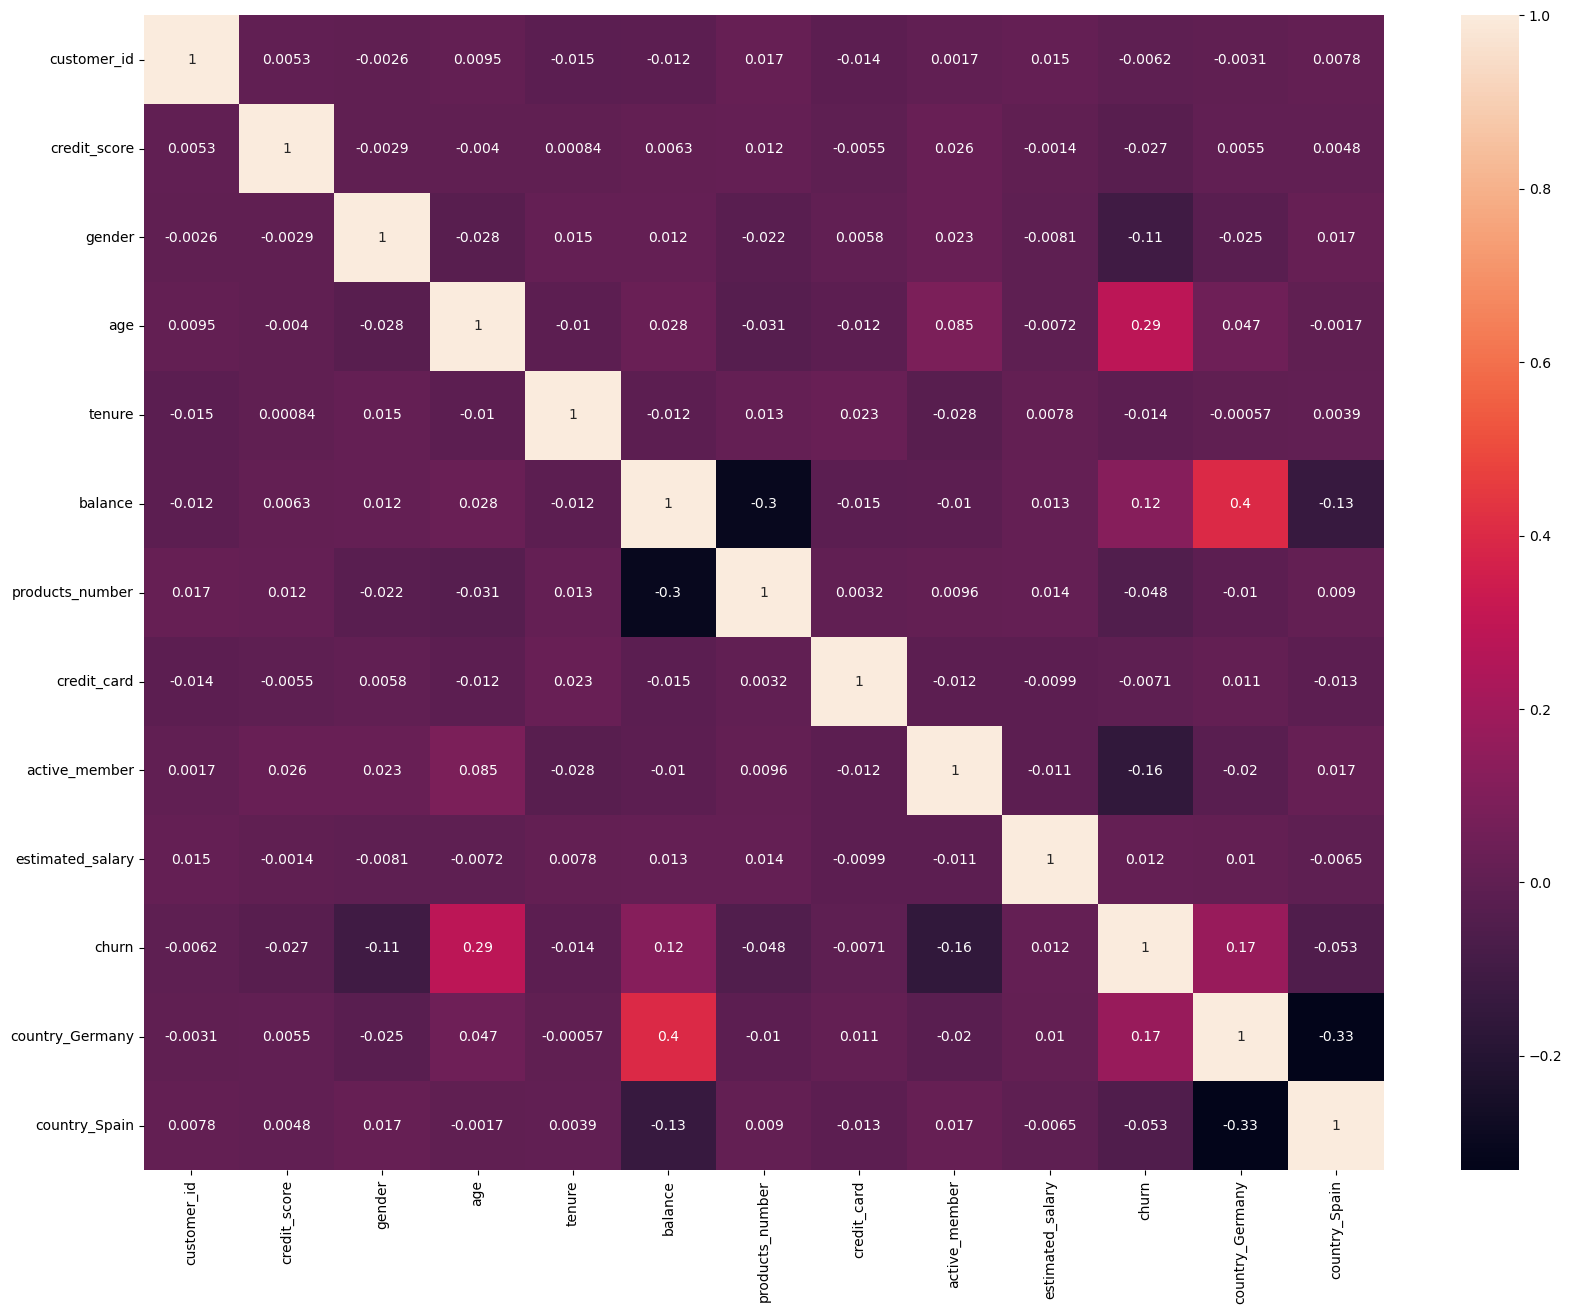

In [106]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot=True)

##### 1.No Multicolinearity

In [107]:
x = df.drop("churn",axis = 1)
y = df["churn"]

In [108]:
x

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [109]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [110]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_list

[82.37650691406813,
 46.32423986829487,
 2.208142345553561,
 14.952804206021314,
 4.010965878007091,
 3.344011886318584,
 8.892840603145622,
 3.4000706144991746,
 2.0839550153303064,
 4.033724862536745,
 1.7884276261124363,
 1.494987190398232]

In [111]:
vif_values = pd.Series(vif_list,index = x.columns)
vif_values

customer_id         82.376507
credit_score        46.324240
gender               2.208142
age                 14.952804
tenure               4.010966
balance              3.344012
products_number      8.892841
credit_card          3.400071
active_member        2.083955
estimated_salary     4.033725
country_Germany      1.788428
country_Spain        1.494987
dtype: float64

<Axes: >

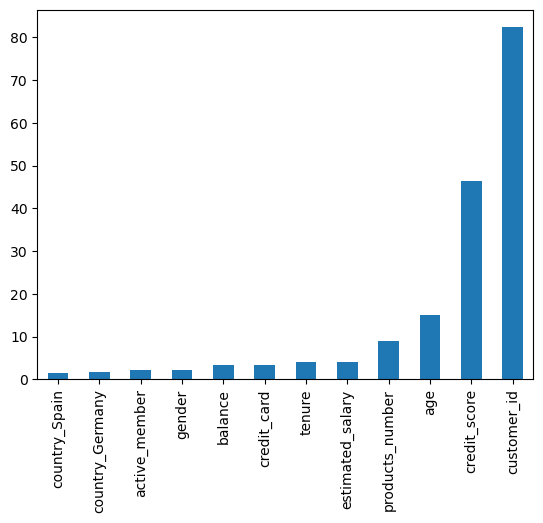

In [112]:
vif_values.sort_values().plot(kind = 'bar')

#### 6.Model Training

In [113]:
x

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [114]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

##### Data spliting

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.6,random_state=2,stratify=y)

In [116]:
x_train

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain
6727,15610416,745,0,36,9,0.00,1,1,0,19605.18,0,0
2128,15605835,743,1,37,8,69143.91,2,0,1,105780.18,0,0
63,15751208,684,1,56,8,78707.16,1,1,1,99398.36,0,1
3165,15581282,651,0,39,6,0.00,1,1,0,24176.44,0,0
6873,15693088,628,0,37,9,0.00,2,1,1,34689.77,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2511,15693267,679,0,34,7,121063.85,1,1,0,56984.58,1,0
6750,15690546,618,0,42,2,0.00,4,0,0,111097.39,0,0
8826,15570194,412,1,29,5,0.00,2,0,0,12510.53,0,0
1235,15600700,523,1,63,6,116227.27,1,1,1,119404.63,1,0


In [117]:
y_train

6727    1
2128    0
63      0
3165    0
6873    0
       ..
2511    0
6750    1
8826    0
1235    0
1173    0
Name: churn, Length: 6000, dtype: int64

In [118]:
y_train.value_counts()

0    4778
1    1222
Name: churn, dtype: int64

In [119]:
x_test

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain
5908,15641934,749,0,46,9,66582.81,1,1,0,78753.12,0,1
6604,15801188,774,0,47,6,94722.88,1,0,1,61450.96,0,0
3344,15654292,565,1,33,8,130368.31,2,1,0,105642.43,1,0
9090,15813911,809,0,39,5,0.00,1,1,0,77705.75,0,0
5596,15796957,597,1,35,9,0.00,3,0,1,73181.39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5043,15718454,712,0,44,2,0.00,2,0,0,45738.94,0,1
9799,15722731,653,1,46,0,119556.10,1,1,0,78250.13,0,0
3475,15770554,769,1,31,4,61297.05,2,1,1,7118.02,0,0
9020,15807194,718,1,34,5,113922.44,2,1,0,30772.22,0,1


In [120]:
y_test

5908    1
6604    0
3344    0
9090    0
5596    1
       ..
5043    0
9799    1
3475    0
9020    0
2884    0
Name: churn, Length: 4000, dtype: int64

In [121]:
y_test.value_counts()

0    3185
1     815
Name: churn, dtype: int64

#### Creating Instance of Logistic Regression

In [122]:
logistic_clf = LogisticRegression()
logistic_clf

LogisticRegression()

In [123]:
logistic_clf.fit(x_train,y_train)

LogisticRegression()

In [124]:
logistic_clf.coef_

array([[-1.22449425e-07, -9.30739571e-10, -4.16718616e-11,
         2.10439555e-09, -2.67226243e-11,  5.58960663e-06,
        -1.32693964e-11,  4.92953291e-13, -4.93412703e-11,
         9.32760638e-07,  5.48940543e-11, -1.58687788e-11]])

In [125]:
logistic_clf.intercept_

array([4.96011592e-15])

#### 7.Model Evaluation

##### 1. Testing data evaluation

In [126]:
logistic_clf.score(x_test,y_test)

0.79625

In [127]:
y_pred = logistic_clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [129]:
y_test[10:20]

707     0
9364    0
7968    0
9933    0
1430    0
8047    0
8547    0
6119    0
414     0
9316    1
Name: churn, dtype: int64

In [130]:
y_test.value_counts()

0    3185
1     815
Name: churn, dtype: int64

In [131]:
confusion_matrix(y_test,y_pred)

array([[3185,    0],
       [ 815,    0]], dtype=int64)

In [132]:
clf_report = classification_report(y_test,y_pred)
print('Classification Report is :\n', clf_report)

Classification Report is :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      3185
           1       0.00      0.00      0.00       815

    accuracy                           0.80      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.63      0.80      0.71      4000



##### 2.Training data evaluation

In [133]:
logistic_clf.score(x_train,y_train)

0.7963333333333333

In [134]:
y_pred_train = logistic_clf.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
y_pred_train[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [136]:
y_train[10:20]

4191    0
5329    0
4054    1
1130    0
8678    0
2111    0
9106    1
7131    0
1889    0
325     0
Name: churn, dtype: int64

In [137]:
y_train.value_counts()

0    4778
1    1222
Name: churn, dtype: int64

In [138]:
confusion_matrix(y_pred_train,y_train)

array([[4778, 1222],
       [   0,    0]], dtype=int64)

In [139]:
clf_report = classification_report(y_pred_train,y_train)
print('Classification Report is :\n', clf_report)

Classification Report is :
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      6000
   macro avg       0.50      0.40      0.44      6000
weighted avg       1.00      0.80      0.89      6000



#### ROC Curve

In [140]:
logistic_clf.predict_proba(x_train)

array([[0.86911998, 0.13088002],
       [0.80624158, 0.19375842],
       [0.80155951, 0.19844049],
       ...,
       [0.86931234, 0.13068766],
       [0.75937508, 0.24062492],
       [0.79859496, 0.20140504]])

In [141]:
logistic_clf.predict_proba(x_train).shape

(6000, 2)

In [142]:
y_pred_train_prob = logistic_clf.predict_proba(x_train)
y_pred_train_prob

array([[0.86911998, 0.13088002],
       [0.80624158, 0.19375842],
       [0.80155951, 0.19844049],
       ...,
       [0.86931234, 0.13068766],
       [0.75937508, 0.24062492],
       [0.79859496, 0.20140504]])

In [143]:
y_train[10:20]

4191    0
5329    0
4054    1
1130    0
8678    0
2111    0
9106    1
7131    0
1889    0
325     0
Name: churn, dtype: int64

In [144]:
y_pred_train_prob[10:20]

array([[0.76933752, 0.23066248],
       [0.85584296, 0.14415704],
       [0.78159899, 0.21840101],
       [0.76178688, 0.23821312],
       [0.80779256, 0.19220744],
       [0.86001152, 0.13998848],
       [0.78437505, 0.21562495],
       [0.76253595, 0.23746405],
       [0.73379744, 0.26620256],
       [0.72998059, 0.27001941]])

In [145]:
y_pred_train[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [146]:
y_pred_train_prob[:,1]

array([0.13088002, 0.19375842, 0.19844049, ..., 0.13068766, 0.24062492,
       0.20140504])

In [147]:
fpr,tpr,thresh = roc_curve(y_train,y_pred_train_prob[:,1])

In [148]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99581415, 0.99581415,
       1.        ])

In [149]:
tpr

array([0.00000000e+00, 8.18330606e-04, 3.27332242e-03, ...,
       9.99181669e-01, 1.00000000e+00, 1.00000000e+00])

In [150]:
thresh

array([1.38901358, 0.38901358, 0.36201102, ..., 0.12725639, 0.12725166,
       0.12617395])

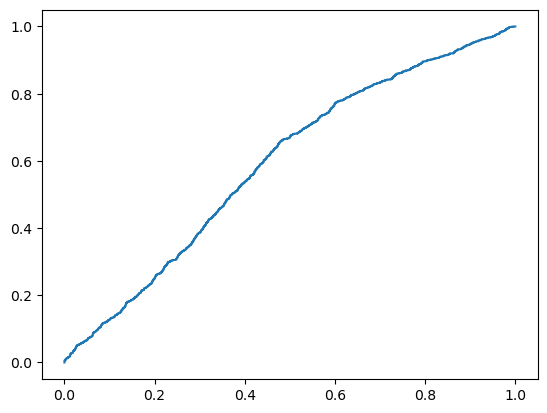

In [151]:
plt.plot(fpr,tpr)

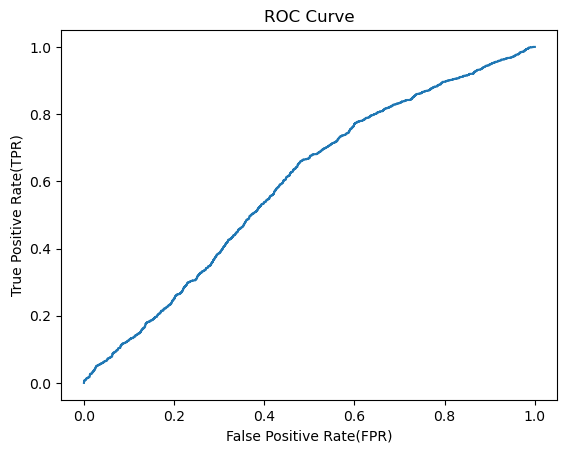

In [152]:
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.savefig("ROC_Curve.png")

In [153]:
px.scatter(x = fpr, y = tpr)

#### Prediction on Single Row

In [154]:
x_test[10:11]

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain
707,15773809,620,1,42,4,0.0,2,1,0,6232.31,0,0


In [155]:
logistic_clf.classes_

array([0, 1], dtype=int64)

In [156]:
logistic_clf.predict(x_test[10:11])[0]

0

In [157]:
logistic_clf.coef_

array([[-1.22449425e-07, -9.30739571e-10, -4.16718616e-11,
         2.10439555e-09, -2.67226243e-11,  5.58960663e-06,
        -1.32693964e-11,  4.92953291e-13, -4.93412703e-11,
         9.32760638e-07,  5.48940543e-11, -1.58687788e-11]])

In [158]:
logistic_clf.n_features_in_

12

In [159]:
x.shape[1]

12

In [160]:
column_names = x.columns.to_list()
column_names

['customer_id',
 'credit_score',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'country_Germany',
 'country_Spain']

In [161]:
customer_id = 15815271
credit_score = 755
gender = "Male"
age = 43
tenure = 6
balance = 165048.5
products_number = 3
credit_card = 1
active_member = 0
estimated_salary = 6929.41
country = "Spain"

gender = gender_data[gender]
country = "country_"+ country

country_index = column_names.index(country)
country_index

test_array = np.zeros([1,logistic_clf.n_features_in_])
test_array[0,0] = customer_id
test_array[0,1] = credit_score
test_array[0,2] = gender
test_array[0,3] = age
test_array[0,4] = tenure
test_array[0,5] = balance
test_array[0,6] = products_number
test_array[0,7] = credit_card
test_array[0,8] = active_member
test_array[0,9] = estimated_salary
test_array[0,country_index] = 1

predict_churn_rate =logistic_clf.predict(test_array)[0]
predict_churn_rate

0

In [162]:
with open("logistic_classification.pkl","wb") as f:
    pickle.dump(logistic_clf,f)

In [163]:
project_data = {"Gender":gender_data,
               'Column Name': column_names}
with open("proj_data.json","w") as f:
    json.dump(project_data,f)